In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scroll bar when displaying Folium map
}

<IPython.core.display.Javascript object>

In [2]:
#  I'll be using the folium package to render the data into a map in Jupyter.

import folium
import pandas as pd

# get the location information for this dataset
df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

In [3]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
# In this code cell, transform the Data_Value column
df['Data_Value'] = df['Data_Value'] / 10
maxes = df[df['Element'] == 'TMAX']
mins = df[df['Element'] == 'TMIN']

In [5]:
# create a DataFrame of maximum temperature by date
max_all = maxes.groupby('Date').max().reset_index()
max_all = maxes[~maxes['Date'].isin(['2008-02-29','2012-02-29'])]
# create a DataFrame of minimum temperatures by date
min_all = mins.groupby('Date').min().reset_index()
min_all = mins[~mins['Date'].isin(['2008-02-29','2012-02-29'])]

In [6]:
# calculate the minimum and maximum values for the day of the year for 2005 through 2014
max_all['day'] = max_all['Date'].str.split('-',n=1).map(lambda x: x[1])
max_all['year'] = max_all['Date'].str.split('-',n=1).map(lambda x: x[0])
max_prev = max_all[max_all['year'] != '2015']
max_days_prev = max_prev.groupby('day').max()
min_all['day'] = min_all['Date'].str.split('-',n=1).map(lambda x: x[1])
min_all['year'] = min_all['Date'].str.split('-',n=1).map(lambda x: x[0])
min_prev = min_all[min_all['year'] != '2015']
min_days_prev = min_prev.groupby('day').min()
# calculate the minimum and maximum values for the years 2015
max_2015 = max_all[max_all['year'] == '2015']
min_2015 = min_all[min_all['year'] == '2015']
max_days_2015 = max_2015.groupby('day').max()
min_days_2015 = min_2015.groupby('day').min()

In [7]:
#Get Outliers
colder = pd.merge(min_days_prev,min_days_2015,on=('day'))
colder = colder[colder['Data_Value_x'] > colder['Data_Value_y']]
hotter = pd.merge(max_days_prev,max_days_2015,on=('day'))
hotter = hotter[hotter['Data_Value_x'] < hotter['Data_Value_y']]

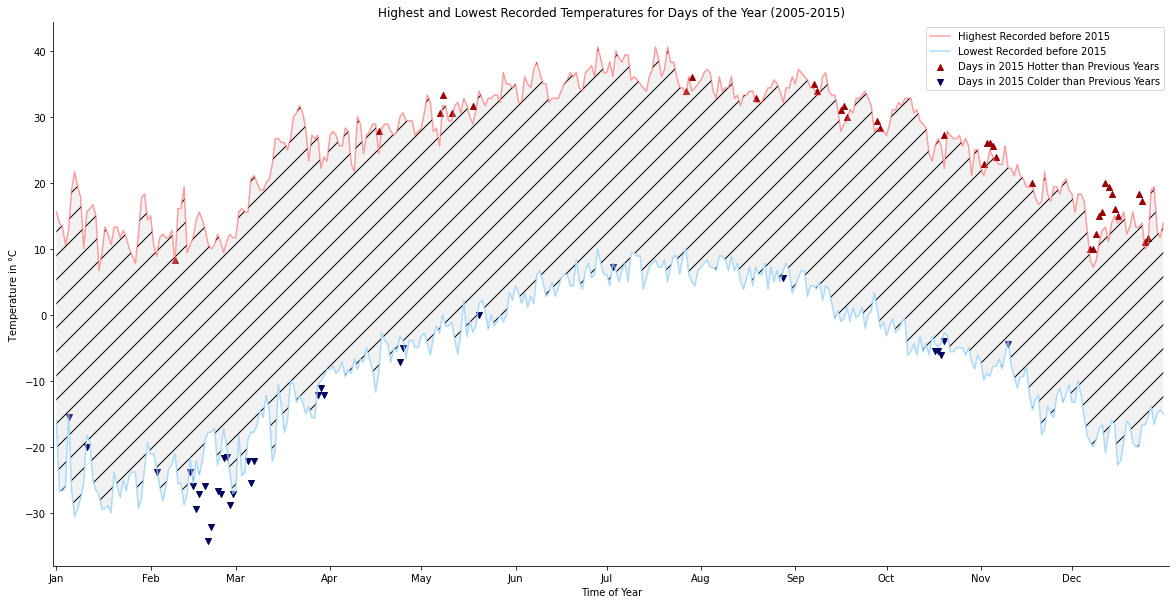

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from calendar import month_abbr
# put your plotting code here!
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.xlabel('Time of Year')
plt.ylabel('Temperature in $\degree$C')
plt.title('Highest and Lowest Recorded Temperatures for Days of the Year (2005-2015)')
plt.plot(pd.to_datetime(max_days_prev.index,format='%m-%d').strftime('%m-%d'),max_days_prev['Data_Value'],color='xkcd:light red',alpha = 0.5)
plt.plot(pd.to_datetime(min_days_prev.index,format='%m-%d').strftime('%m-%d'),min_days_prev['Data_Value'],color='xkcd:light blue',alpha = 0.75)
plt.scatter(pd.to_datetime(hotter.index,format='%m-%d').strftime('%m-%d'),hotter['Data_Value_y'],marker='^',color='xkcd:blood red')
plt.scatter(pd.to_datetime(colder.index,format='%m-%d').strftime('%m-%d'),colder['Data_Value_y'],marker='v',color='xkcd:dark blue')
plt.gca().fill_between(range(len(max_days_prev)), 
                       max_days_prev['Data_Value'], min_days_prev['Data_Value'], 
                       facecolor='xkcd:silver',
                       hatch='/',
                       alpha=0.25)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xticks(ax.get_xticks()[:-1])
plt.xlim(left=-1,right=366)
plt.legend(['Highest Recorded before 2015', 'Lowest Recorded before 2015','Days in 2015 Hotter than Previous Years','Days in 2015 Colder than Previous Years'],loc=0)
plt.gca().spines.values()
ax.spines[['right', 'top']].set_visible(False)
plt.savefig('jesse_assignment2.jpeg',facecolor='white', transparent=False,)